# M4 Metric Analysis

The M4 metric is designed to evaluate the fraction of the survey footprint over which proper motions of stars could be measured to a nominally acceptable precision.  This notebook is designed to evaluate the results of this metric for the RGPS wide-area survey.

In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
from astropy.table import Table, Column, vstack
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import config_utils
import regions
import plot_metric_results
import visualization_utils
import numpy as np
from astropy import units as u 
from mw_plot import MWSkyMap

# Set up

In [2]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [3]:
# Load definitions of science cases and extract the set of topical categories
science_cases = config_utils.read_config(path.join(getcwd(), '..', 'config', 'rgps_science_cases.json'))

science_categories = []
for author, info in science_cases.items():
    if info['ready_for_use'] and info['category'] not in science_categories:
        science_categories.append(info['category'])

## M4 Proper Motion Precision

This metric estimates the precision to which proper motions can be measured within surveyed regions.  A threshold of 1 mas is adopted as the desired precision goal, to enable a range of science.  The metric value represents the percentage of the survey region where this threshold is met. 

Note that it only makes sense to calculate this metric for the survey regions, rather than for individual science cases.  

Furthermore, this metric is most relevant to the wide_area survey design.  This survey has a unique sequence of visits designed to maximise the area covered in multiple filters.  Repeated visits to each HEALpixel are made, but in different filters, meaning that there are no regions which receive multiple visits in any single filter.  

For this reason, the metric is calculated based on the repeated visits to each region in each filter, but also summed over all the visits in all filters. 

In [4]:
# Load the M4 metric results
m4_results_file = path.join(getcwd(), '..', 'metric_results', 'M4_proper_motion_precision_results.txt')

m4_results = Table.read(m4_results_file, format='ascii')
m4_results.pprint_all()

Survey_strategy     Survey_region                         Optic                     M4_proper_motion_precision Median_nvisits_pixel
--------------- ---------------------- -------------------------------------------- -------------------------- --------------------
      wide_area          Serpens_South                     F106 F129 F158 F184 F213                      100.0                  2.0
      wide_area                   Disk                          F129 F158 F184 F213                      100.0                  2.0
      wide_area            Disk_Carina                          F129 F158 F184 F213                      100.0                  2.0
      wide_area             Bulge_Bpos                               F129 F158 F213                      100.0                  2.0
      wide_area             Bulge_Bneg                               F129 F158 F213                      100.0                  2.0
      deep_spec    Deep_NGC3324_Carina F062 F087 F106 F129 F158 F184 F213 G1

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_50145/2564374920.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=fontsize, horizontalalignment='right')


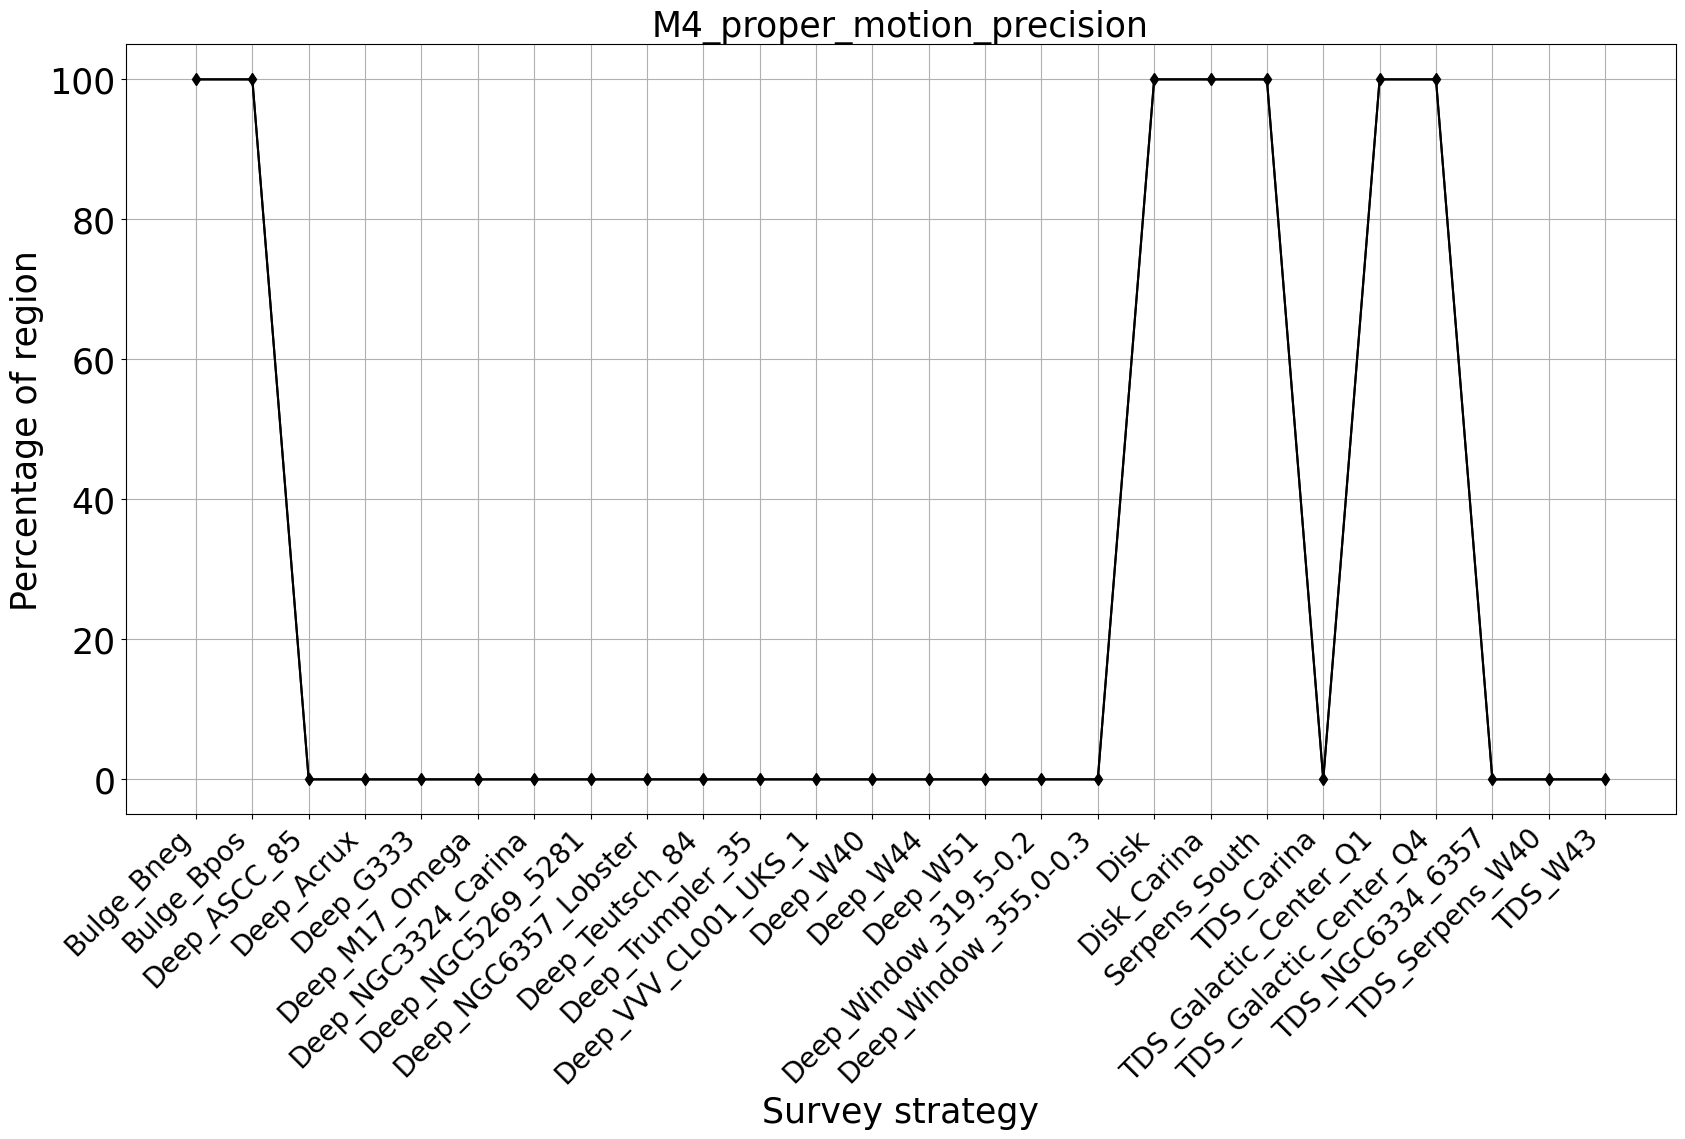

In [5]:
# Create plot of survey strategy and region for a given filter versus metric 
# Make a list of the survey strategies included 
survey_options = list(set(m4_results['Survey_region']))
survey_options.sort()

fontsize = 25

optic_list = sim_config['OPTICAL_COMPONENTS']

# Plot the metric results 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

xdata = np.arange(0, len(survey_options), 1)
ydata = []
for k, survey_region in enumerate(survey_options):
    jdx = np.where(m4_results['Survey_region'] == survey_region)[0]
    ydata.append(m4_results['M4_proper_motion_precision'][jdx][0])

ax.plot(xdata, ydata, 
        color='black', marker='d')
ax.plot(xdata, ydata, color='black', linestyle='-')

ax.set_xlabel('Survey strategy', fontsize=fontsize)
ax.set_ylabel('Percentage of region', fontsize=fontsize)
ax.set_title('M4_proper_motion_precision', fontsize=fontsize)
ax.set_xticks(range(0,len(survey_options),1))
ax.set_xticklabels(survey_options, rotation=45.0, horizontalalignment='right', fontsize=20)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels(yticklabels, fontsize=fontsize, horizontalalignment='right')
ax.grid()

output = False
if output:
    plt.tight_layout()
    plt.savefig(path.join(sim_config['root_dir'], 'metric_results', 'm4_results.png'))